M4 Actividad 2 Ajuste de hiperparámetros

Kevin Antonio González Díaz A01338316

2 de mayo de 2023

1.- Revisa con el profesor el material anexo sobre Ajuste de hiperparámetros EvalAjusteHiperparametros.pdf Download EvalAjusteHiperparametros.pdf  y prueba el notebook que puedes bajar de https://www.kaggle.com/amolbhivarkar/knn-for-classification-using-scikit-learnLinks to an external site.

In [2]:
#Load the necessary python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/kevingonzal/cienciaDatos/main/diabetes%203.csv')
#Print the first 5 rows of the dataframe.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape


(768, 9)

In [4]:
#Let's create numpy arrays for features and target
X = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

Let's split the data randomly into training and test set.

We will fit/train a classifier on the training set and make predictions on the test set. Then we will compare the predictions with the known labels.

Scikit-learn provides facility to split data into train and test set using train_test_split method.

In [5]:
#importing train_test_split
from sklearn.model_selection import train_test_split

It is a best practice to perform our split in such a way that out split reflects the labels in the data. In other words, we want labels to be split in train and test set as they are in the original dataset. So we use the stratify argument.

Also we create a test set of size of about 40% of the dataset.

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42, stratify=y)

Let's create a classifier using k-Nearest Neighbors algorithm.

First let us first observe the accuracies for different values of k.

In [7]:
#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

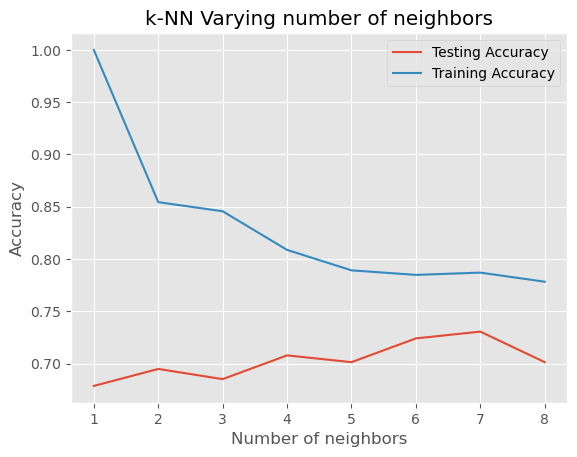

In [8]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=7. So lets create a KNeighborsClassifier with number of neighbors as 7.

In [9]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [10]:
#Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [11]:
#Get accuracy. Note: In case of classification algorithms score method represents accuracy.
knn.score(X_test,y_test)

0.7305194805194806

In [12]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

array([[165,  36],
       [ 47,  60]])

Considering confusion matrix above:

True negative = 165

False positive = 36

True postive = 60

Fasle negative = 47

Confusion matrix can also be obtained using crosstab method of pandas.

In [13]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


Classification Report

Another important report is the Classification report. It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.

In [14]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       201
           1       0.62      0.56      0.59       107

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.73      0.73      0.73       308



ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

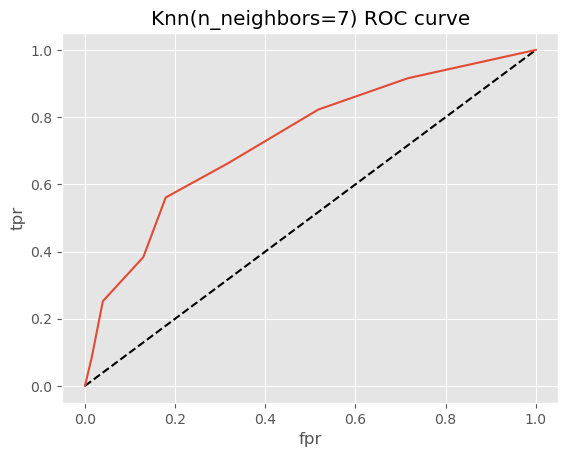

In [15]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [16]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)


0.7345050448691124

Hyperparameter tuning

The value of k (i.e 7) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [17]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [18]:
knn_cv.best_score_


0.7578558696205755

In [19]:
knn_cv.best_params_

{'n_neighbors': 14}

In [20]:
knn_cv.cv_results_

{'mean_fit_time': array([0.00107942, 0.00073733, 0.00049458, 0.00043454, 0.00045838,
        0.00061073, 0.0005312 , 0.00047669, 0.00043921, 0.00043359,
        0.00043573, 0.00043578, 0.00044193, 0.00046816, 0.0004684 ,
        0.00044956, 0.00043406, 0.00044012, 0.00042787, 0.00042915,
        0.0004283 , 0.00043015, 0.00043373, 0.0004343 , 0.0004271 ,
        0.00042772, 0.00042539, 0.00043249, 0.00049138, 0.00047421,
        0.00042996, 0.00042896, 0.00042911, 0.0004283 , 0.00043201,
        0.00042815, 0.00042825, 0.00042934, 0.00042882, 0.00042725,
        0.00042787, 0.00043063, 0.00042739, 0.00042863, 0.00042973,
        0.00042953, 0.00042977, 0.00042796, 0.00042696]),
 'std_fit_time': array([4.84149362e-04, 1.24447428e-04, 4.93211000e-05, 1.56854059e-05,
        6.97894147e-05, 6.67406130e-05, 6.20898011e-05, 2.54170755e-05,
        1.25946406e-05, 2.23961231e-06, 2.44817689e-06, 8.33633554e-06,
        1.71367075e-05, 1.84065320e-05, 6.83726291e-05, 2.08659712e-05,
        3

Thus a knn classifier with number of neighbors as 14 achieves the best score/accuracy of 0.7578 i.e about 76%

a) Explica qué es "Estratificado" al definir una partición entrenamiento/prueba

Una partición estratificada es cuando se divide el conjunto de datos en subconjuntos basados en los valores de una variable de interés. Por ejemplo, en nuestro conjunto de datos la clasificación es binaria en el que la variable objetivo outcome es "0" o "1", y se puede realizar una partición estratificada para asegurarse de que tanto el conjunto de entrenamiento como el conjunto de prueba contengan una proporción similar de casos 0 y 1.


b) ¿Puedes utilizar la función pandas.crosstab par? Explica los argumentos utilizados en esta función.

Se usa para crear una tabla de frecuencias cruzadas, que muestra la frecuencia en la que aparecen una o varias variables categóricas en relación con otras variables categóricas. Algunos de los argumentos utilizados son index, que es la variable que se utilizará para definir las filas de la tabla. Puede ser una columna del DataFrame o una serie; columns que es la variable que se utilizará para definir las columnas de la tabla y ouede ser una columna del DataFrame o una serie; values (que es opcional) nos dice la variable numérica que se utilizará para calcular los valores de la tabla, si no lo ponemos se mostrará la frecuencia de ocurrencia de las combinaciones de las variables categóricas; aggfunc (que es opcional) nos dice la función que se utilizará para agregar los valores si se especifica la variable values, si no lo especificamos se pone la función len que cuenta las observaciones. Otras funciones que se pueden utilizar incluyen sum, mean, max, min, etc. En nuestro ejemplo nos ayudó a realizar la tablita para la matriz de confusión y sacar los valores verdaderos positivos (TP), TN, FP y FN.


c) Explica qué se obtiene al utilizar metrics.classification_report

Se obtiene un informe que resume la calidad de las predicciones realizadas por el modelo de aprendizaje, y se basa en comparar las predicciones del modelo con los valores verdaderos de las clases del conjunto de datos de prueba. En el ejemplo de este notebbok nos dio precision,recall, f1-score, support tanto de la clase 0 como de la clase 1, así como su accuracy, para poder medir el rendimiento del modelo.



d) ¿Cómo se generó el valor de k que se utilizó en el algoritmo knn? ¿Qué valor se utilizó?

Se obtuvo de dos formas distintas: la primera fue un poco más rústica y menos precisa, en donde a través de la gráfica donde se medía el accuracy del modelo KNN variando los valores de k, y visualmente se obtuvo que era con el valor de k=7 donde había un pico máximo.

Después a través de probar diferentes hiperparámetros, los hiperparámetros son valores fijos antes del entrenamiento que determinan el comportamiento del modelo. Luego se entrena el modelo con cada conjunto de hiperparámetros diferentes por separado. Se ajustan los hiperparámetros y se entrena el modelo en cada iteración. Se evalúa el rendimiento del modelo para cada conjunto de hiperparámetros diferentes para determinar qué combinación de hiperparámetros funciona mejor. Y ya al final se selecciona el modelo con el mejor rendimiento después de comparar los resultados de cada modelo entrenado con diferentes hiperparámetros. Y de esta forma obtuvimos el mejor score con la función knn_cv.best_score_, y para obtener el número óptimo de k lo sacamos con la función knn_cv.best_params_, y de esta forma obtuvimos el accuracy 0.7578125 con k=14.

e) Para qué se utilizó la técnica GridSearchCV? ¿Qué hiperparámetros se definieron en el grid para generar un nuevo modelo knn al usar GridSearchCV? ¿En qué variable se pueden revisar los mejores valores de los hiperparámetros obtenidos al aplicar esta técnica? ¿Qué valores se obtuvieron? ¿En qué variable se puede revisar el valor obtenido por validación cruzada para una métrica dada?

La técnica GridSearchCV se utilizó para encontrar el valor óptimo del hiperparámetro n_neighbors de KNN. En el grid  se definió un solo hiperparámetro de n_neighbors con valores de 1 a 49. Esto sirve para encontrar el mejor conjunto de hiperparámetros encontrados. En este caso el mejor valor de n_neighbors lo sacamos con best_params_, y nos dio que era 14. El valor de la mejor puntuación obtenida en la validación cruzada la sacamos con best_score_, que es 0.7578125. Esto significa que el modelo KNN con un valor de k = 14 obtuvo la puntuación media más alta en la validación cruzada de 5 veces. Para ver los resultados de la validación cruzada se puede usar el comando: knn_cv.cv_results_, que ya lo apliqué arriba y se obtuvieron los tiempos promedio de ajuste y evaluación del modelo (mean_fit_time y mean_score_time) y su desviación estándar (std_fit_time), los cuales son útiles para comparar la eficiencia del modelo para los diferentes valores de los hiperparámetros.


f) Agrega al notebook el siguiente código
   1) Utilizando el modelo knn generado con GridSearchCV realiza la predicción para los casos de prueba. Muestra la matriz de confusión y el reporte de clasificación para esta predicción. ¿Los valores obtenidos de las métricas son mejores? 

In [21]:
from sklearn.metrics import confusion_matrix, classification_report


y_pred = knn_cv.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n\n", confusion)

report = classification_report(y_test, y_pred)
print("\n\nReporte de clasificación:\n\n", report)


Matriz de confusión:

 [[180  21]
 [ 51  56]]


Reporte de clasificación:

               precision    recall  f1-score   support

           0       0.78      0.90      0.83       201
           1       0.73      0.52      0.61       107

    accuracy                           0.77       308
   macro avg       0.75      0.71      0.72       308
weighted avg       0.76      0.77      0.76       308



Podemos ver que aumentó la precisión de la clase q, pasando de 0.62 a 0.73, la sensibilidad aumentó de 0.82 a 0.90 en la clase 0, pero disminuyó un poco para la clase 1. El f1-score de ambas clases aumentó, y el accuracy aumentó de 0.73 a 0.77

 2) Genera los valores fpr, tpr de la curva ROC y su área bajo la curva y grafica los dos modelos en la misma gráfica. Muestra las leyendas que indiquen a qué modelo corresponde cada curva.

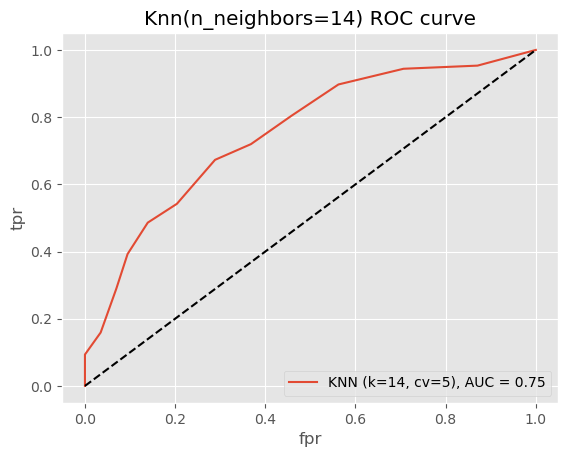

In [22]:
from sklearn.metrics import roc_curve, auc

knn_cv = KNeighborsClassifier(n_neighbors=14)
knn_cv.fit(X_train, y_train)

probs = knn_cv.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='KNN (k=14, cv=5), AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=14) ROC curve')
plt.legend(loc="lower right")
plt.show()


 3) Genera un nuevo modelo knn usando GridSearchCV pero ahora  considerando el optimizar la métrica de sensibilidad. Para ello, dentro de la estrategia de optimización de hiperparámetros incluye el atributo scoring='recall'. Genera predicciones y revisa el resultado de las métricas para ese modelo, incluyendo curva ROC y AUC.
 
 ¿Se puede generar un modelo tratando de optimizar la métrica de precisión? 
 
 Si, usando scoring='precision'

In [48]:
from sklearn.model_selection import GridSearchCV

# Define el rango de valores de n_neighbors a explorar
param_grid = {'n_neighbors': np.arange(1,50)}

# Define el modelo KNN
knn = KNeighborsClassifier()

# Define el modelo GridSearchCV con scoring='recall' para sensbilidad
knn_cv = GridSearchCV(knn, param_grid, cv=5, scoring='recall')

# Entrena el modelo GridSearchCV con los datos de entrenamiento
knn_cv.fit(X_train, y_train)

# Obtén la mejor combinación de hiperparámetros encontrada
knn_cv.best_params_


{'n_neighbors': 9}

In [49]:
y_pred = knn_cv.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n\n", confusion)

report = classification_report(y_test, y_pred)
print("\n\nReporte de clasificación:\n\n", report)


Matriz de confusión:

 [[164  37]
 [ 51  56]]


Reporte de clasificación:

               precision    recall  f1-score   support

           0       0.76      0.82      0.79       201
           1       0.60      0.52      0.56       107

    accuracy                           0.71       308
   macro avg       0.68      0.67      0.67       308
weighted avg       0.71      0.71      0.71       308



In [50]:
# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=9)

# Entrenar el modelo con los datos de entrenamiento

knn.fit(X_train, y_train)

# Generar predicciones con los datos de prueba

y_pred = knn.predict(X_test)

# Calcular las métricas

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       201
           1       0.60      0.52      0.56       107

    accuracy                           0.71       308
   macro avg       0.68      0.67      0.67       308
weighted avg       0.71      0.71      0.71       308



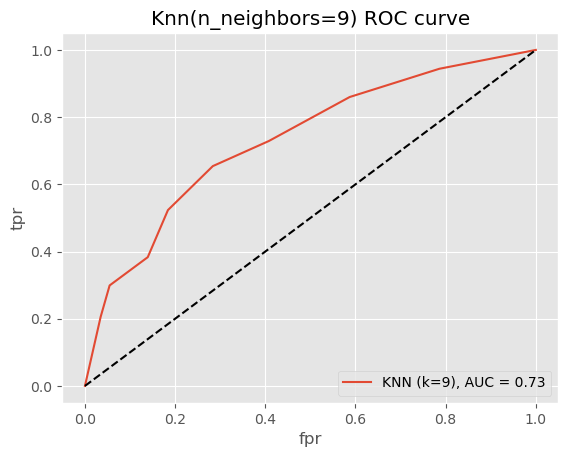

In [51]:
knn_cv = KNeighborsClassifier(n_neighbors=9)
knn_cv.fit(X_train, y_train)

probs = knn_cv.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='KNN (k=9), AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.legend(loc="lower right")
plt.show()


   4) Genera ahora un modelo usando la estrategia de búsqueda de hiperparámetros random . Para ver cómo se utiliza te puedes apoyar en el siguiente tutorial https://www.datacamp.com/community/tutorials/parameter-optimization-machine-learning-modelsLinks to an external site. . No tienes que hacer el tutorial, sólo revisar cómo aplicaron RandomSearchCV y aplicarla al modelo kNN. ¿Qué valores se obtuvieron. Realiza la predicción y el reporte. 
   
   ¿RandomSearch te garantiza encontrar los mejores valores de parámetros? No, pero si es útil para buscar muchas combinaciones de parámetros ya que es posible que algunos valores relevantes de los hiperparámetros no sean evaluados durante la búsqueda aleatoria
   
 

In [60]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import time

# crea el modelo de clasificador KNN
knn = KNeighborsClassifier()

# define los hiperparámetros a ajustar
param_dist = {'n_neighbors': np.arange(1, 20),
              'weights': ['uniform', 'distance']}

# crea el objeto RandomSearchCV
random_search = RandomizedSearchCV(knn, param_distributions=param_grid, cv=3, n_jobs=-1)

# entrena el modelo
random_search.fit(X_train, y_train)


start_time = time.time()
random_result = random_search.fit(X, y)
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')


Best: 0.735677 using {'n_neighbors': 28}
Execution time: 0.05505204200744629 ms


In [61]:
y_pred = random_search.predict(X_test)

confusion = confusion_matrix(y_test, y_pred)
print("\nMatriz de confusión:\n\n", confusion)

report = classification_report(y_test, y_pred)
print("\n\nReporte de clasificación:\n\n", report)


Matriz de confusión:

 [[181  20]
 [ 56  51]]


Reporte de clasificación:

               precision    recall  f1-score   support

           0       0.76      0.90      0.83       201
           1       0.72      0.48      0.57       107

    accuracy                           0.75       308
   macro avg       0.74      0.69      0.70       308
weighted avg       0.75      0.75      0.74       308



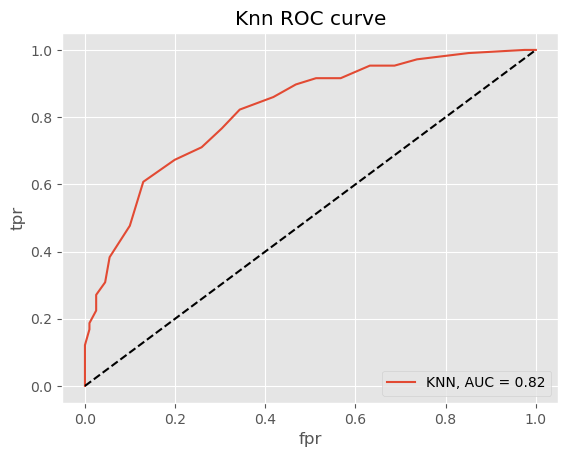

In [62]:
probs = random_search.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='KNN, AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn ROC curve')
plt.legend(loc="lower right")
plt.show()